## Project Programming for Data Analytics 2018

http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf


# Dataset Simulation

## Student ID G00219132
    
This notebook is a submission for Project 2018 for the Module **Programming for Data Analytics** The module is delivered as part of the [Higher Diploma in Data Analytics](https://www.gmit.ie/computing/higher-diploma-science-computing-data-analytics-ict-skills) in [Galway Mayo IT](https://www.gmit.ie/), Galway.

### problem statement outline
Below is an extract from the project instructions.

**Problem statement**

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. 

Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – thedata set itself can simply be displayed in an output cell within the notebook.

*Note students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.*

### notebook structure
The notebook is split up into the following sections

* Section One - General setup and importatation of necessary python libraries/packages
* Section Two - Details of chosen phenomenon 
* Section Three - the types of variables involved, their likely distributions, and their relationships with each other.
* Section Four - Synthesise/simulate a data set as closely matching their properties as possible.
* Section Five - ????????????????????/
* Section Six - references and conclusion

### Section one - general set up
programming language - Python 3.7.0.for some information about Python and it's uses see the wikipedia page, [Python](https://en.wikipedia.org/wiki/Python_(programming_language))

python packages imported

* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org)
* NumPy [NumPy](http://www.numpy.org/)
* Seaborn [Seaborn](https://seaborn.pydata.org)
* Pandas [Pandas](https://pandas.pydata.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

### Section Two - Details of chosen phenomenon 

### Section Three - the types of variables involved, their likely distributions, and their relationships with each other.

In [5]:
import numpy as np

building a student dataset to look at vaiables that might influence progression as reported by HEA[1]

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import pandas as pd

 ### Section Four - Synthesise/simulate a data set as closely matching their properties as possible.

In [9]:
M_F =np.random.choice (['male', 'female'], 100, p =[0.49,0.51])
M_F

array(['male', 'male', 'female', 'female', 'female', 'female', 'male',
       'female', 'female', 'female', 'female', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'female',
       'female', 'male', 'female', 'female', 'male', 'female', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'female', 'female', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'female', 'male',
       'female', 'female', 'female', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'male',
       'female', 'male', 'female', 'female', 'male', 'female', 'female',
       '

In [10]:
full_part = np.random.choice (['full time', 'part time','remote'], 100, p =[0.8,0.17,0.03])
full_part

array(['full time', 'remote', 'full time', 'full time', 'full time',
       'part time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'part time', 'full time',
       'part time', 'full time', 'full time', 'full time', 'full time',
       'part time', 'full time', 'full time', 'full time', 'part time',
       'full time', 'remote', 'full time', 'part time', 'part time',
       'full time', 'full time', 'remote', 'full time', 'full time',
       'full time', 'part time', 'remote', 'full time', 'full time',
       'full time', 'full time', 'part time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'remote', 'full time', 'full time',
       'full time', 'part time', 'remote', 'remote', 'part time',
       'full 

In [11]:

pref =[]
for i in range (1,101):
   # pref = (print(int(13**np.random.random())))
    p = (int(10**np.random.random()))
    pref.append(p)
    ## assume preference follows benfords law
print (pref)
print(i)


[2, 5, 5, 5, 2, 9, 7, 4, 6, 6, 2, 1, 5, 9, 1, 6, 1, 2, 1, 1, 4, 3, 5, 2, 1, 2, 3, 9, 3, 3, 2, 6, 2, 4, 4, 2, 6, 2, 2, 1, 4, 1, 1, 1, 4, 1, 2, 1, 5, 1, 2, 5, 1, 1, 3, 2, 7, 6, 4, 5, 8, 3, 2, 1, 5, 6, 1, 4, 7, 1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 9, 1, 1, 2, 2, 7, 1, 7, 1, 1, 3, 1, 5, 1, 4, 2, 8, 3, 8, 3, 1]
100


In [12]:
cao = np.random.randint(32, 70, size=100)
cao=cao*5
print(cao)
# cao pts in stps of 5 in range 160-350

[275 305 320 160 210 325 340 220 175 180 200 340 260 295 285 285 235 330
 325 265 235 165 190 345 190 285 255 200 185 160 320 270 280 170 305 190
 330 230 265 310 160 175 180 340 230 255 320 285 345 240 315 250 290 315
 345 335 335 320 325 160 215 295 335 345 325 345 265 235 220 180 170 240
 280 175 185 325 205 315 220 190 320 330 205 175 245 170 330 235 295 200
 190 345 315 310 160 240 295 315 165 320]


In [13]:
# below creates an array of random dates based on published student breakdowns SEP 2016
DOB =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(4):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
for i in range(34):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)    
for i in range(38): ##changed to 38 to allow for rounding in published %
    dob19 = random_date('1997-01-01', 200)
    DOB.append(dob19)
for i in range(9):
    dob20 = random_date('1996-01-01', 200)
    DOB.append(dob20)
for i in range(3):
    dob21 = random_date('1995-01-01', 200)
    DOB.append(dob21)   
for i in range(1):
    dob22 = random_date('1994-01-01', 200)
    DOB.append(dob22)
for i in range(1):
    dob23 = random_date('1993-01-01', 200)
    DOB.append(dob23)
for i in range(2):
    dob24 = random_date('1992-01-01', 200)
    DOB.append(dob24)
for i in range(3):
    dob25_29 = random_date('1987-01-01', 1460)
    DOB.append(dob25_29)
    print (dob25_29)
for i in range(5):
    dob30up = random_date('1941-01-01', 16425)
    DOB.append(dob30up)
    print (dob30up)
    
print (DOB)
#adapted from response to stackoverflow query[3]

1988-08-06
1990-06-17
1989-05-25
1957-08-23
1982-09-06
1978-06-23
1973-02-13
1941-02-07
[numpy.datetime64('1999-11-23'), numpy.datetime64('1999-08-26'), numpy.datetime64('2000-04-26'), numpy.datetime64('1999-05-10'), numpy.datetime64('1998-06-18'), numpy.datetime64('1998-03-02'), numpy.datetime64('1998-01-28'), numpy.datetime64('1998-02-20'), numpy.datetime64('1998-06-05'), numpy.datetime64('1998-04-21'), numpy.datetime64('1998-05-09'), numpy.datetime64('1998-01-31'), numpy.datetime64('1998-05-16'), numpy.datetime64('1998-05-11'), numpy.datetime64('1998-07-03'), numpy.datetime64('1998-03-22'), numpy.datetime64('1998-07-18'), numpy.datetime64('1998-05-19'), numpy.datetime64('1998-03-04'), numpy.datetime64('1998-01-18'), numpy.datetime64('1998-05-01'), numpy.datetime64('1998-01-05'), numpy.datetime64('1998-06-18'), numpy.datetime64('1998-07-02'), numpy.datetime64('1998-03-05'), numpy.datetime64('1998-02-28'), numpy.datetime64('1998-05-16'), numpy.datetime64('1998-07-09'), numpy.datetime6

In [14]:
# below attempts to base cao pts on dob!
## 50/50 to test need to get % breakdowns and pass in##
DOB =[]
cao =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(50):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
    cao17 = (np.random.randint(32, 70)*5)
    cao.append(cao17)
  #  print(dob17)
  #  print(cao17)
    
for i in range(50):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)
    caor = np.random.randint(500, 550)
    cao.append(caor)

In [15]:
df = pd.DataFrame ()
df ["full_part"] = full_part
df ["pref"] = pref
df ["CAO"] = cao
df ["Male_Female"] = M_F
df ["Date of Birth"]=DOB
#df ["list"] = (int(13**np.random.random()))

In [16]:
df

,full_part,pref,CAO,Male_Female,Date of Birth
0,full time,2,340,male,1999-02-17
1,remote,5,305,male,2000-01-10
2,full time,5,185,female,1999-12-08
3,full time,5,305,female,1999-02-11
4,full time,2,205,female,2000-01-05
5,part time,9,195,female,2000-09-25
6,full time,7,290,male,1999-01-03
7,full time,4,270,female,2000-08-30
8,full time,6,200,female,2000-04-07
9,full time,6,270,female,2000-01-24


In [17]:
df.describe()
df.describe(include='all') 
##df.groupby ("full_part").describe(include='all') 
import datetime
import sys
old_stdout = sys.stdout
sys.stdout = open('generalstats.txt', 'w')
print(df.describe())
print('\n'*2)
df.describe(include='all') 
print(df.describe(include='all'))
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))

sys.stdout = old_stdout
df.describe(include='all') 

# output to a csv adapted from code used for GMIT Programming & Scripting project 2018 [1] and
# trouble shooting assistance from a stackoverflow query responseto someone else's query[2]


,full_part,pref,CAO,Male_Female,Date of Birth
count,100,100.000000,100.00000,100,100
unique,3,NaN,NaN,2,93
top,full time,NaN,NaN,female,1998-03-03 00:00:00
freq,81,NaN,NaN,51,3
first,NaN,NaN,NaN,NaN,1998-01-04 00:00:00
last,NaN,NaN,NaN,NaN,2000-09-25 00:00:00
mean,NaN,3.260000,390.44000,NaN,NaN
std,NaN,2.363955,137.73612,NaN,NaN
min,NaN,1.000000,175.00000,NaN,NaN
25%,NaN,1.000000,263.75000,NaN,NaN


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


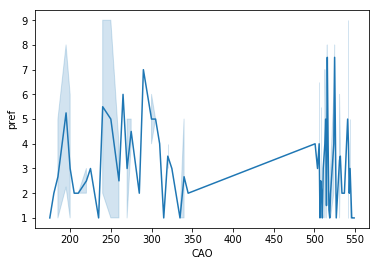

In [18]:
sns.lineplot (x = 'CAO', y = "pref", data = df)

### Section Six - references and conclusion

[HEA](http://hea.ie/)

https://en.wikipedia.org/wiki/Benford%27s_law

https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html ##describe 

[1] [programming & Scripting project 2018](https://github.com/Hudsonsue/GMIT-project-2018-programming-scripting)
[2][stackoverflow save to file](https://stackoverflow.com/questions/45200375/stdout-redirect-from-jupyter-notebook-is-landing-in-the-terminal)
[3][stackoverflow random dates](https://stackoverflow.com/questions/41006182/generate-random-dates-within-a-range-in-numpy)

### END